In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
file_path = 'Lift3.csv'
data = pd.read_csv(file_path)

In [5]:
# Display the first few rows of the dataset
print("Data Preview:")
data

Data Preview:


,13:34:36.987,-2.61,-7.17,6.06,-0.14,-0.11,0.05,0,97293,22.16
0,13:34:37.135,-2.38,-7.15,6.05,-0.12,-0.06,0.02,0.0,97293.0,22.16
1,13:34:37.298,-2.52,-7.18,5.90,-0.11,0.07,-0.05,0.0,97295.0,22.18
2,13:34:37.454,-2.43,-7.22,5.97,-0.07,0.12,-0.09,0.0,97295.0,22.17
3,13:34:37.596,-2.55,-7.10,6.01,-0.05,0.15,-0.09,0.0,97294.0,22.17
4,13:34:37.751,-2.50,-7.07,6.13,-0.03,0.11,-0.07,0.0,97295.0,22.17
...,...,...,...,...,...,...,...,...,...,...
340,13:35:39.535,-1.66,-7.14,6.32,-0.09,-0.01,0.01,0.0,97343.0,22.66
341,13:35:39.693,-1.61,-7.16,6.32,-0.10,0.01,-0.00,0.0,97349.0,22.67
342,13:35:39.843,-1.60,-7.15,6.28,-0.06,0.04,-0.04,0.0,97339.0,22.67
343,13:35:40.006,-1.50,-7.13,6.31,-0.02,0.03,-0.04,0.0,97346.0,22.67


In [6]:
# Check the column names to ensure correct data mapping
print("\nColumn Names:")
print(data.columns)


Column Names:
Index(['13:34:36.987', '-2.61', '-7.17', '6.06', '-0.14', '-0.11', '0.05', '0',
       '97293', '22.16'],
      dtype='object')


In [7]:
data.columns = [
    'Timestamp', 'Ax', 'Ay', 'Az',
    'Rx', 'Ry', 'Rz', 'Null',
    'Pressure', 'Temperature'
]
data

,Timestamp,Ax,Ay,Az,Rx,Ry,Rz,Null,Pressure,Temperature
0,13:34:37.135,-2.38,-7.15,6.05,-0.12,-0.06,0.02,0.0,97293.0,22.16
1,13:34:37.298,-2.52,-7.18,5.90,-0.11,0.07,-0.05,0.0,97295.0,22.18
2,13:34:37.454,-2.43,-7.22,5.97,-0.07,0.12,-0.09,0.0,97295.0,22.17
3,13:34:37.596,-2.55,-7.10,6.01,-0.05,0.15,-0.09,0.0,97294.0,22.17
4,13:34:37.751,-2.50,-7.07,6.13,-0.03,0.11,-0.07,0.0,97295.0,22.17
...,...,...,...,...,...,...,...,...,...,...
340,13:35:39.535,-1.66,-7.14,6.32,-0.09,-0.01,0.01,0.0,97343.0,22.66
341,13:35:39.693,-1.61,-7.16,6.32,-0.10,0.01,-0.00,0.0,97349.0,22.67
342,13:35:39.843,-1.60,-7.15,6.28,-0.06,0.04,-0.04,0.0,97339.0,22.67
343,13:35:40.006,-1.50,-7.13,6.31,-0.02,0.03,-0.04,0.0,97346.0,22.67


In [8]:
data = data.drop(columns=['Null'])

In [9]:
# Convert 'Ax', 'Ay', and 'Az' columns to numeric type
data['Ax'] = pd.to_numeric(data['Ax'], errors='coerce')
data['Ay'] = pd.to_numeric(data['Ay'], errors='coerce')
data['Az'] = pd.to_numeric(data['Az'], errors='coerce')

# Calculate the acceleration magnitude (Ax, Ay, Az)
data['Acceleration_Magnitude'] = np.sqrt(data['Ax']**2 + data['Ay']**2 + data['Az']**2)
data

,Timestamp,Ax,Ay,Az,Rx,Ry,Rz,Pressure,Temperature,Acceleration_Magnitude
0,13:34:37.135,-2.38,-7.15,6.05,-0.12,-0.06,0.02,97293.0,22.16,9.663819
1,13:34:37.298,-2.52,-7.18,5.90,-0.11,0.07,-0.05,97295.0,22.18,9.628749
2,13:34:37.454,-2.43,-7.22,5.97,-0.07,0.12,-0.09,97295.0,22.17,9.678543
3,13:34:37.596,-2.55,-7.10,6.01,-0.05,0.15,-0.09,97294.0,22.17,9.645341
4,13:34:37.751,-2.50,-7.07,6.13,-0.03,0.11,-0.07,97295.0,22.17,9.685649
...,...,...,...,...,...,...,...,...,...,...
340,13:35:39.535,-1.66,-7.14,6.32,-0.09,-0.01,0.01,97343.0,22.66,9.678719
341,13:35:39.693,-1.61,-7.16,6.32,-0.10,0.01,-0.00,97349.0,22.67,9.685045
342,13:35:39.843,-1.60,-7.15,6.28,-0.06,0.04,-0.04,97339.0,22.67,9.649917
343,13:35:40.006,-1.50,-7.13,6.31,-0.02,0.03,-0.04,97346.0,22.67,9.638620


In [10]:
# Calculate mean and variance for Pressure
pressure_mean = data['Pressure'].mean()
pressure_variance = data['Pressure'].var()

In [19]:
pressure_mean

97386.82848837209

In [20]:
pressure_variance

2396.2183114109516

In [11]:
# Calculate mean and variance for Acceleration Magnitude
acceleration_mean = data['Acceleration_Magnitude'].mean()
acceleration_variance = data['Acceleration_Magnitude'].var()


In [22]:
acceleration_variance

0.10669690421142981

In [21]:
acceleration_mean

9.689658650996726

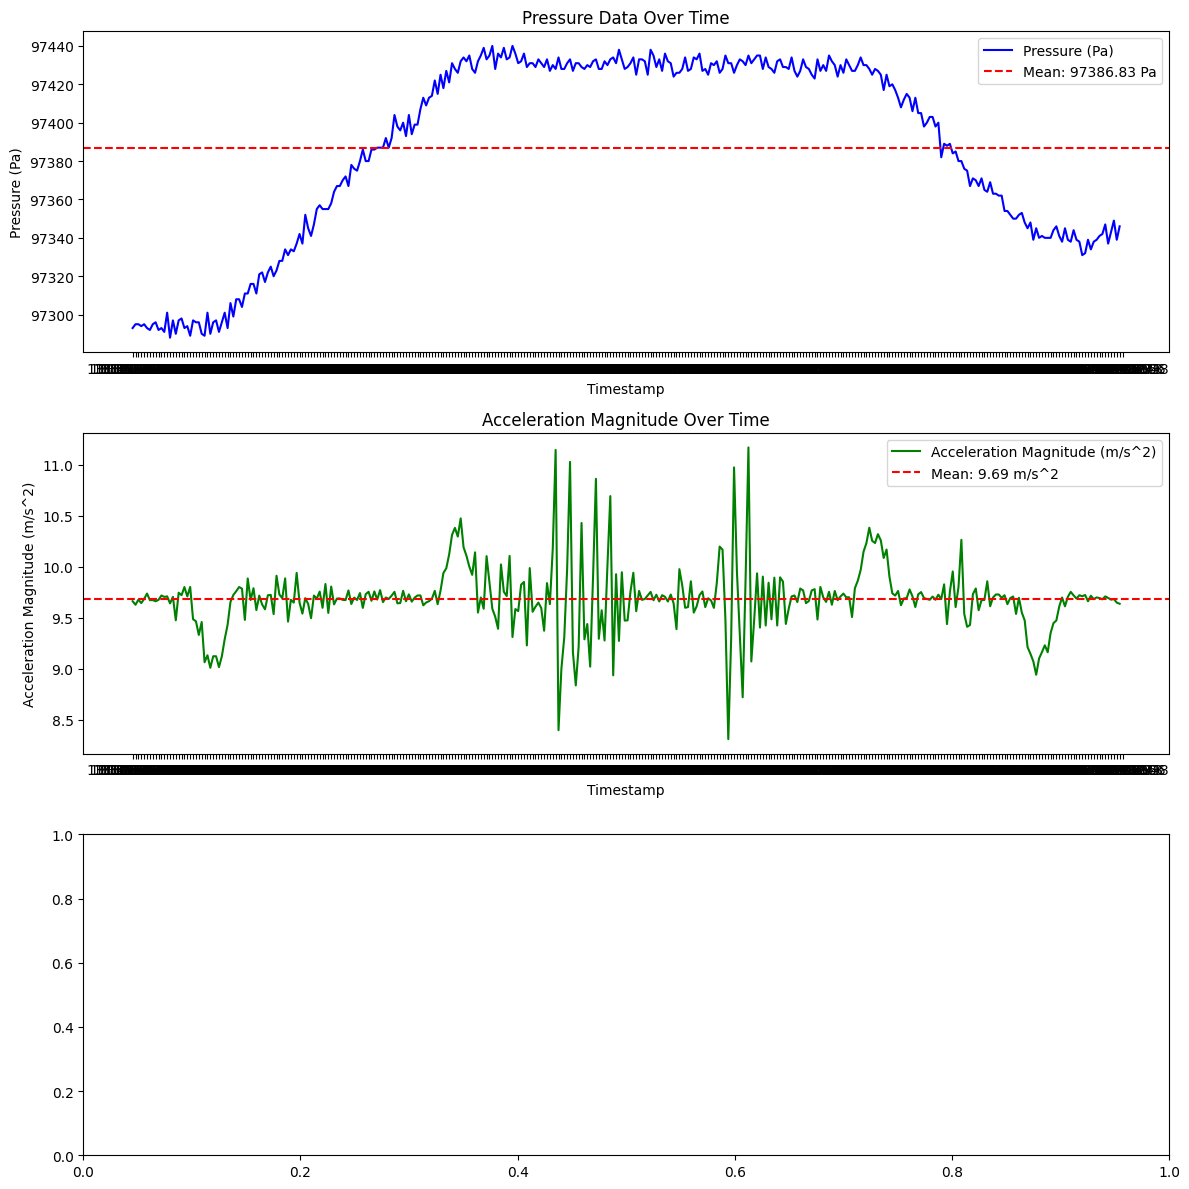

In [12]:
# Plot the data for visualization
fig, axs = plt.subplots(3, 1, figsize=(12, 12))

# Plot Pressure Data
axs[0].plot(data['Timestamp'], data['Pressure'], label="Pressure (Pa)", color="blue")
axs[0].axhline(y=pressure_mean, color='r', linestyle='--', label=f"Mean: {pressure_mean:.2f} Pa")
axs[0].set_title("Pressure Data Over Time")
axs[0].set_xlabel("Timestamp")
axs[0].set_ylabel("Pressure (Pa)")
axs[0].legend()

# Plot Acceleration Magnitude Data
axs[1].plot(data['Timestamp'], data['Acceleration_Magnitude'], label="Acceleration Magnitude (m/s^2)", color="green")
axs[1].axhline(y=acceleration_mean, color='r', linestyle='--', label=f"Mean: {acceleration_mean:.2f} m/s^2")
axs[1].set_title("Acceleration Magnitude Over Time")
axs[1].set_xlabel("Timestamp")
axs[1].set_ylabel("Acceleration Magnitude (m/s^2)")
axs[1].legend()


# Show the plots
plt.tight_layout()
plt.show()

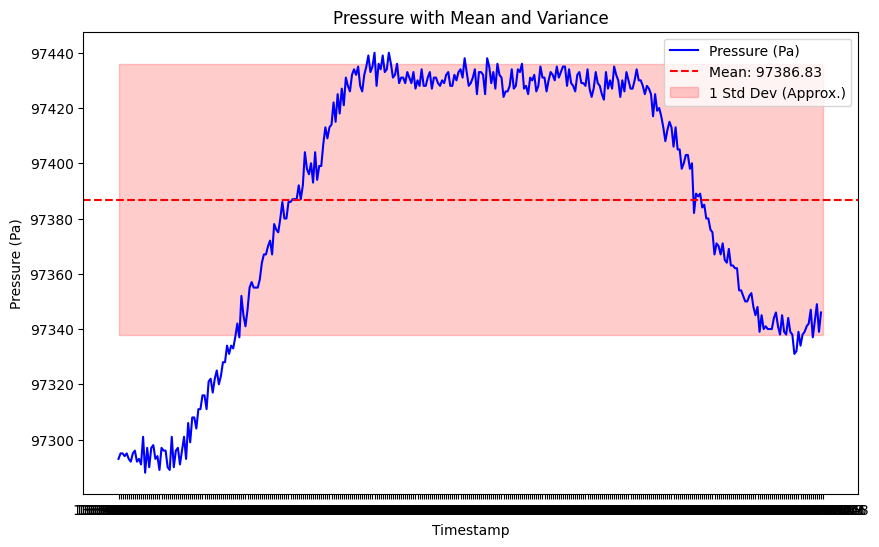

In [13]:
import matplotlib.pyplot as plt

# Plot pressure data with mean
plt.figure(figsize=(10, 6))
plt.plot(data['Timestamp'], data['Pressure'], label='Pressure (Pa)', color='blue')
plt.axhline(y=pressure_mean, color='red', linestyle='--', label=f'Mean: {pressure_mean:.2f}')
plt.fill_between(
    data['Timestamp'],
    pressure_mean - np.sqrt(pressure_variance),
    pressure_mean + np.sqrt(pressure_variance),
    color='red', alpha=0.2, label='1 Std Dev (Approx.)'
)
plt.title('Pressure with Mean and Variance')
plt.xlabel('Timestamp')
plt.ylabel('Pressure (Pa)')
plt.legend()
plt.show()


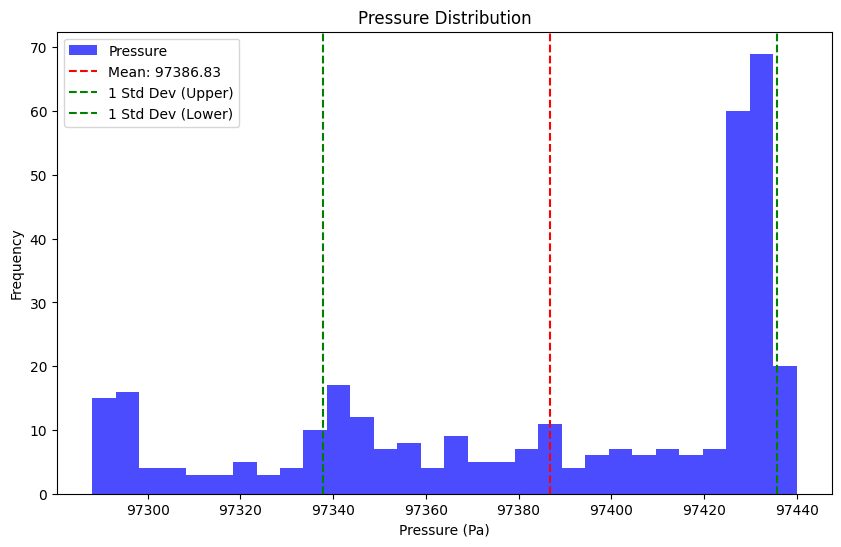

In [14]:
# Pressure histogram
plt.figure(figsize=(10, 6))
plt.hist(data['Pressure'], bins=30, color='blue', alpha=0.7, label='Pressure')
plt.axvline(pressure_mean, color='red', linestyle='--', label=f'Mean: {pressure_mean:.2f}')
plt.axvline(pressure_mean + np.sqrt(pressure_variance), color='green', linestyle='--', label='1 Std Dev (Upper)')
plt.axvline(pressure_mean - np.sqrt(pressure_variance), color='green', linestyle='--', label='1 Std Dev (Lower)')
plt.title('Pressure Distribution')
plt.xlabel('Pressure (Pa)')
plt.ylabel('Frequency')
plt.legend()
plt.show()


In [15]:
pressure_variance

2396.2183114109516

In [31]:
import pandas as pd

# Define chunk size
chunk_size = 3

# Initialize lists to store computed values
means_pressure = []
means_acceleration = []
variances_pressure = []
variances_acc_x = []
variances_acc_y = []
variances_acc_z = []

# Iterate through the dataset in chunks
for i in range(0, len(data), chunk_size):
    chunk = data.iloc[i:i+chunk_size]  # Select 3 rows at a time

    # Compute mean pressure
    mean_pressure = chunk['Pressure'].mean()
    means_pressure.append(mean_pressure)

    # Compute mean acceleration magnitude
    mean_acceleration = chunk[['Ax', 'Ay', 'Az']].mean().mean()
    means_acceleration.append(mean_acceleration)

    # Compute variance of pressure
    variance_pressure = chunk['Pressure'].var()
    variances_pressure.append(variance_pressure)

    # Compute variance of each acceleration axis
    variance_acc_x = chunk['Ax'].var()
    variance_acc_y = chunk['Ay'].var()
    variance_acc_z = chunk['Az'].var()

    variances_acc_x.append(variance_acc_x)
    variances_acc_y.append(variance_acc_y)
    variances_acc_z.append(variance_acc_z)

# Create a DataFrame to store results
summary_df = pd.DataFrame({
    'Mean_Pressure': means_pressure,
    'Mean_Acceleration': means_acceleration,
    'Variance_Pressure': variances_pressure,
    'Variance_Acceleration_X': variances_acc_x,
    'Variance_Acceleration_Y': variances_acc_y,
    'Variance_Acceleration_Z': variances_acc_z
})

# Display all rows without truncation
pd.set_option('display.max_rows', None)

# Print the DataFrame
print(summary_df)

# Reset to default after displaying if needed
pd.reset_option('display.max_rows')


     Mean_Pressure  Mean_Acceleration  Variance_Pressure  \
0     97294.333333          -1.217778           1.333333   
1     97294.000000          -1.183333           1.000000   
2     97294.333333          -1.115556           4.333333   
3     97292.000000          -1.134444           1.000000   
4     97295.333333          -1.075556          44.333333   
5     97295.000000          -1.126667          19.000000   
6     97292.000000          -1.081111           7.000000   
7     97296.333333          -1.124444           0.333333   
8     97293.333333          -1.016667          44.333333   
9     97294.333333          -0.937778          14.333333   
10    97296.000000          -0.946667          25.000000   
11    97299.333333          -0.702222          42.333333   
12    97306.666667          -0.541111           5.333333   
13    97312.666667          -0.801111           8.333333   
14    97316.000000          -0.865556          25.000000   
15    97320.333333          -0.917778   